In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict

dataset_path = "population_log.csv"

df = pd.read_csv(dataset_path)

print("Prvních 10 záznamů:")
print(df.head(10))

print("\nPosledních 10 záznamů:")
print(df.tail(10))

print("\nInformace o datasetu:")
print(df.info())

print("\nNáhodný vzorek dat:")
print(df.sample(5))

Prvních 10 záznamů:
   generation  id      gene_0      gene_1      gene_2      gene_3      gene_4  \
0           0   0 -126.301089 -418.401445 -473.548073  437.761837 -305.615441   
1           0   1 -133.206329  371.921100   28.299617 -390.356456  468.367006   
2           0   2 -255.633176 -284.233848  229.090764  320.816578 -229.563839   
3           0   3 -373.487396 -348.626463  -85.202937  178.331847 -111.481093   
4           0   4   32.975465 -122.050498 -274.864307 -230.400819 -445.063681   
5           0   5  142.387403  166.552359 -499.758187 -262.426966  441.137261   
6           0   6  473.628401 -431.887666  409.907314  420.012023 -209.154641   
7           0   7  191.041982  373.056222  340.681716 -290.429650  345.380456   
8           0   8  458.890997   99.476878 -433.308826   84.571885 -302.521282   
9           0   9  -37.181912  496.980841  384.241611   47.516595 -435.589411   

       gene_5      gene_6      gene_7      gene_8      gene_9  
0   37.451329  324.39412

In [2]:
def compute_inertia(data, labels, centroids):
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        inertia += np.sum((cluster_points - centroids[i])**2)
    return inertia

def elbow_plot(data, k_range):
    inertias = []
    for k in k_range:
        labels, centroids = kmeans_custom(data, k)
        inertia = compute_inertia(data, labels, centroids)
        inertias.append(inertia)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertias, marker='o')
    plt.title("Elbow Method for Optimal k")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia (WCSS)")
    plt.grid(True)
    plt.show()

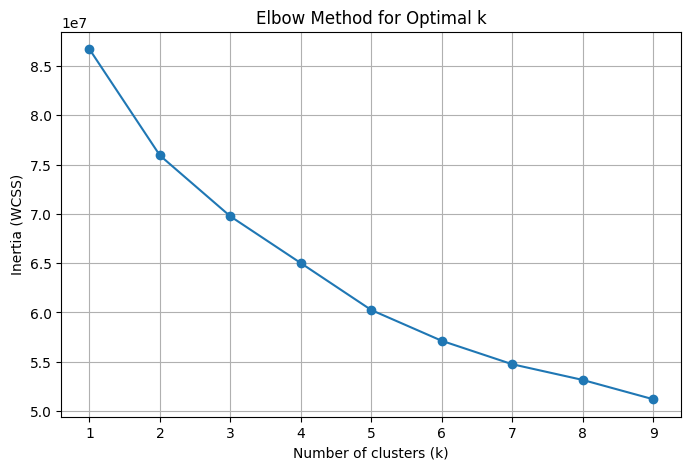

In [ ]:
df = pd.read_csv("population_log_DE.csv")
pop_data = df[df["generation"] == 0].drop(columns=["generation", "id"]).values

elbow_plot(pop_data, range(1, 10))

In [ ]:
def kmeans_custom(data, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        
        centroids = new_centroids
    
    return labels, centroids

def run(dataset, num_clusters, step):
    df = pd.read_csv(dataset)

    unique_generations = sorted(df["generation"].unique())

    selected_generations = [unique_generations[0]] + unique_generations[step-1::step] + [unique_generations[-1]]

    first_gen_data = df[df["generation"] == unique_generations[0]].drop(columns=["generation", "id"]).values
    pca = PCA(n_components=2)
    pca.fit(first_gen_data)

    id_cluster_map = defaultdict(list)


    for gen in selected_generations:
        pop_data = df[df["generation"] == gen].drop(columns=["generation", "id"]).values
        reduced_data = pca.transform(pop_data)

        clusters, centroids = kmeans_custom(pop_data, num_clusters)

        ids = df[df["generation"] == gen]["id"].values

        for ident, cl in zip(ids, clusters):
            id_cluster_map[ident].append(cl)

        plt.figure(figsize=(6, 6))
        scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.7)
        for i in range(num_clusters):
            plt.scatter(
                centroids[i, 0], centroids[i, 1], 
                c=[scatter.to_rgba(i)], marker='X', s=100, edgecolors='black', linewidth=1.5, label=f"Centroid {i}"
            )
        plt.title(f"Generation {gen} - Custom K-Means Clustering")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend()
        plt.show()

        switch_counts = {}
        for ident, history in id_cluster_map.items():
            switches = sum(1 for a, b in zip(history, history[1:]) if a != b)
            switch_counts[ident] = switches

        total = len(switch_counts)
        same = sum(1 for s in switch_counts.values() if s == 0)
        once = sum(1 for s in switch_counts.values() if s == 1)
        many = sum(1 for s in switch_counts.values() if s > 1)

        print("Statistiky pohybu mezi clustery:")
        print(f"Celkem jedinců: {total}")
        print(f"Zůstali ve stejném clusteru: {same} ({same/total*100:.1f} %)")
        print(f"Změnili cluster jednou: {once} ({once/total*100:.1f} %)")
        print(f"Změnili cluster vícekrát: {many} ({many/total*100:.1f} %)")


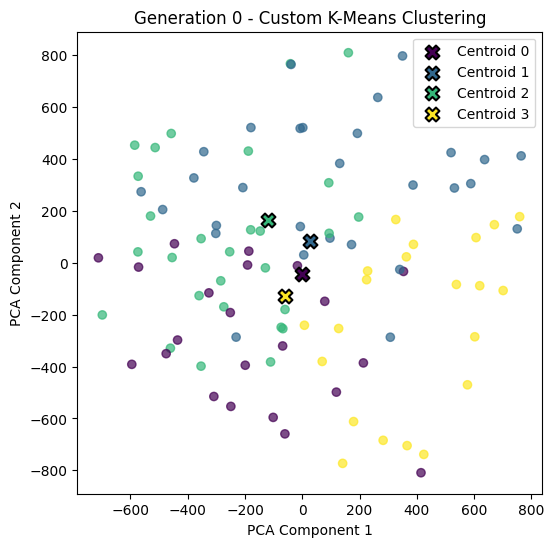

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 100 (100.0 %)
Změnili cluster jednou: 0 (0.0 %)
Změnili cluster vícekrát: 0 (0.0 %)


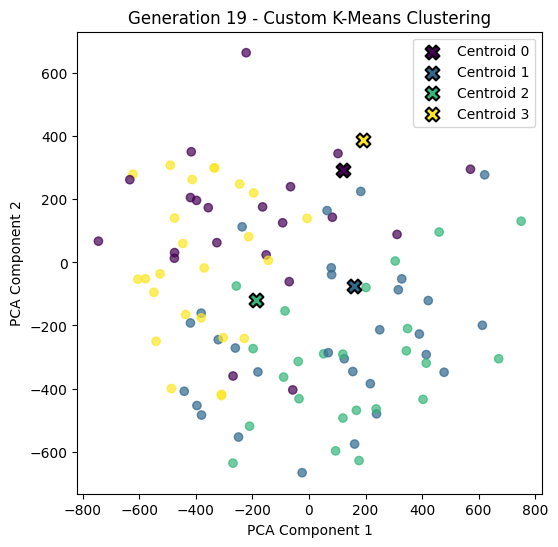

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 27 (27.0 %)
Změnili cluster jednou: 73 (73.0 %)
Změnili cluster vícekrát: 0 (0.0 %)


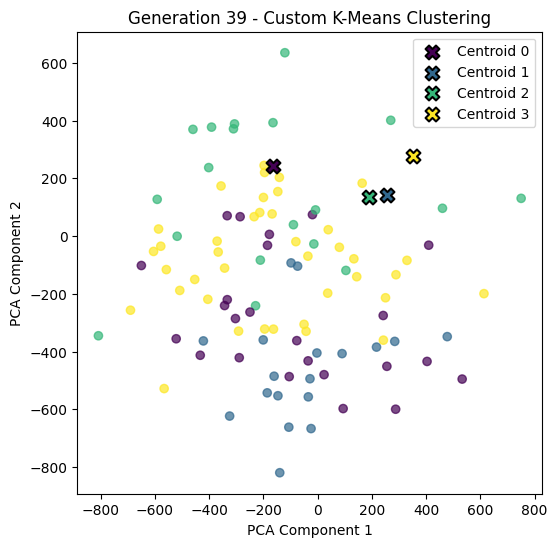

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 8 (8.0 %)
Změnili cluster jednou: 46 (46.0 %)
Změnili cluster vícekrát: 46 (46.0 %)


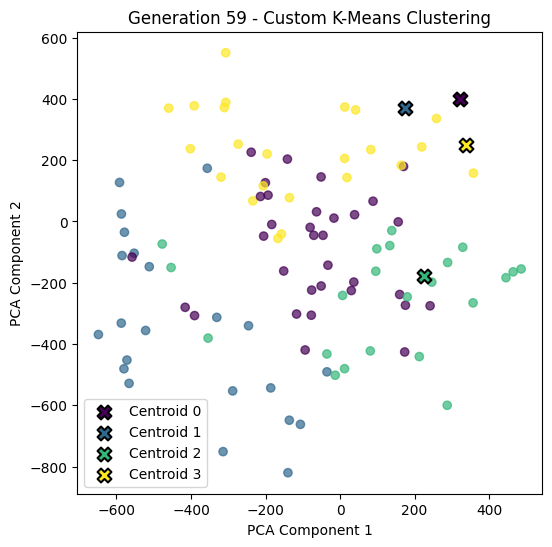

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 6 (6.0 %)
Změnili cluster jednou: 15 (15.0 %)
Změnili cluster vícekrát: 79 (79.0 %)


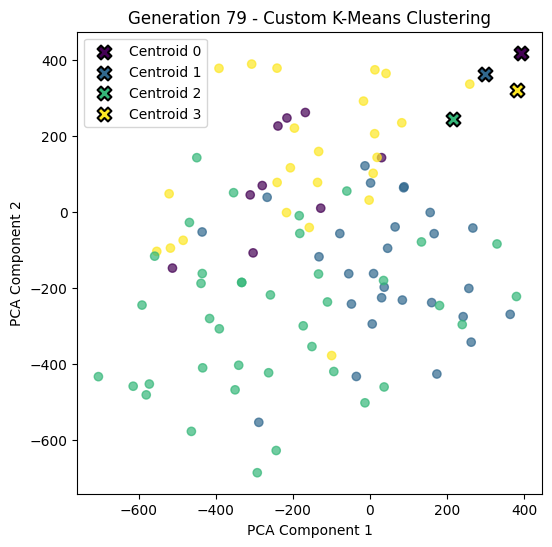

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 4 (4.0 %)
Změnili cluster jednou: 7 (7.0 %)
Změnili cluster vícekrát: 89 (89.0 %)


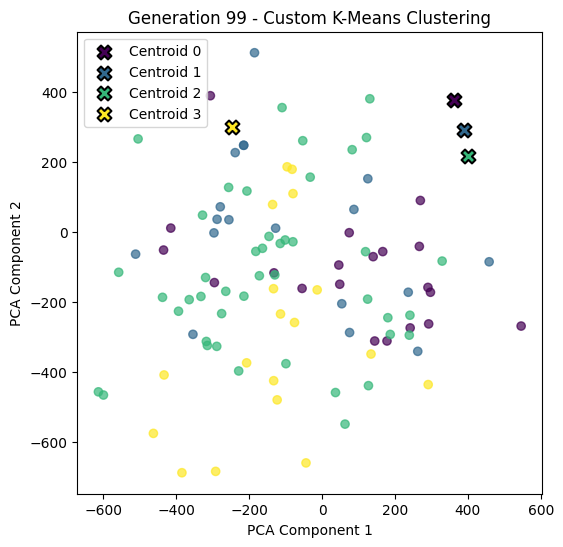

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 3 (3.0 %)
Změnili cluster jednou: 4 (4.0 %)
Změnili cluster vícekrát: 93 (93.0 %)


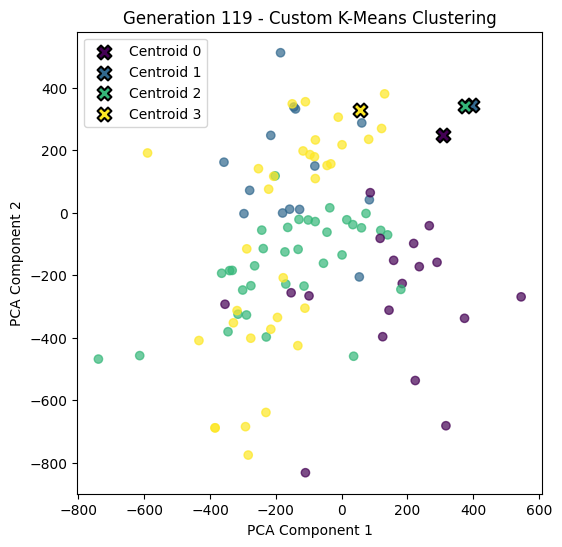

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 3 (3.0 %)
Změnili cluster jednou: 0 (0.0 %)
Změnili cluster vícekrát: 97 (97.0 %)


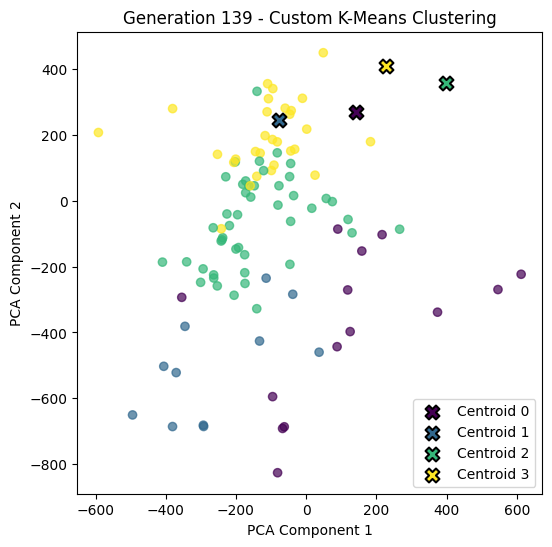

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 3 (3.0 %)
Změnili cluster jednou: 0 (0.0 %)
Změnili cluster vícekrát: 97 (97.0 %)


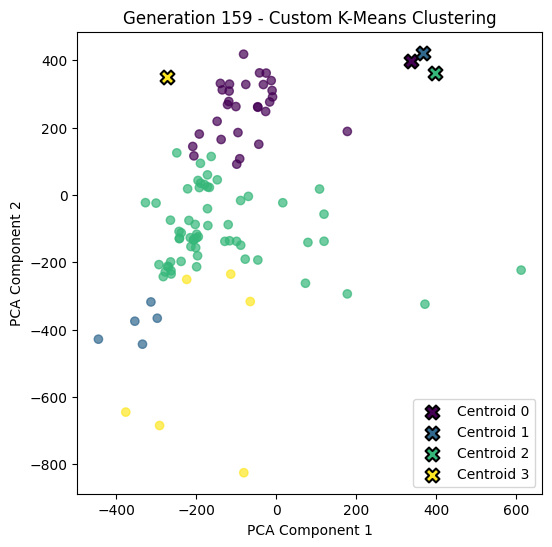

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 1 (1.0 %)
Změnili cluster jednou: 2 (2.0 %)
Změnili cluster vícekrát: 97 (97.0 %)


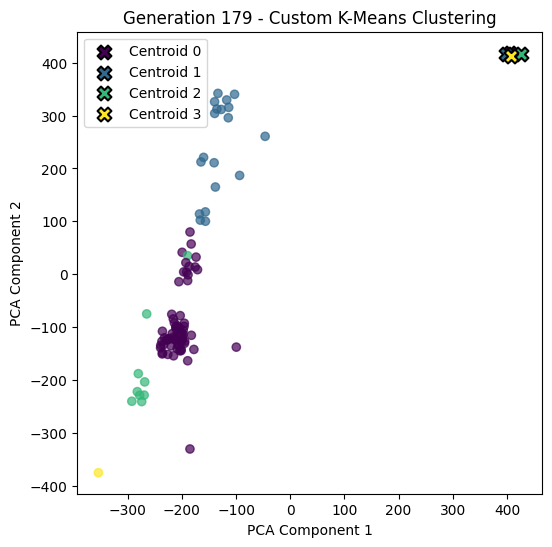

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 1 (1.0 %)
Změnili cluster jednou: 1 (1.0 %)
Změnili cluster vícekrát: 98 (98.0 %)


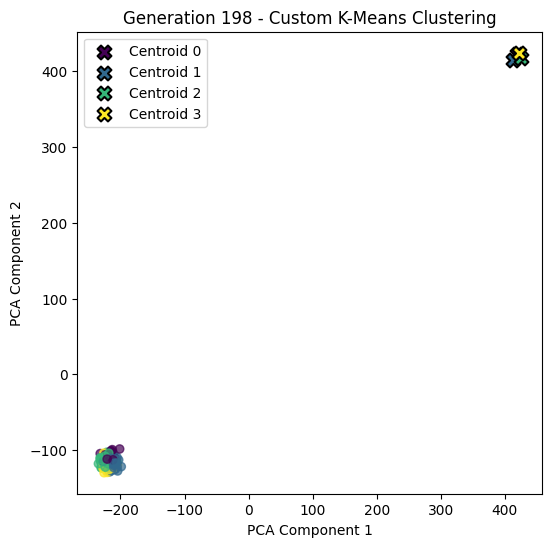

🧠 Statistiky pohybu mezi clustery:
Celkem jedinců: 100
Zůstali ve stejném clusteru: 1 (1.0 %)
Změnili cluster jednou: 0 (0.0 %)
Změnili cluster vícekrát: 99 (99.0 %)


In [10]:
run("population_log_DE.csv", 4, 20)

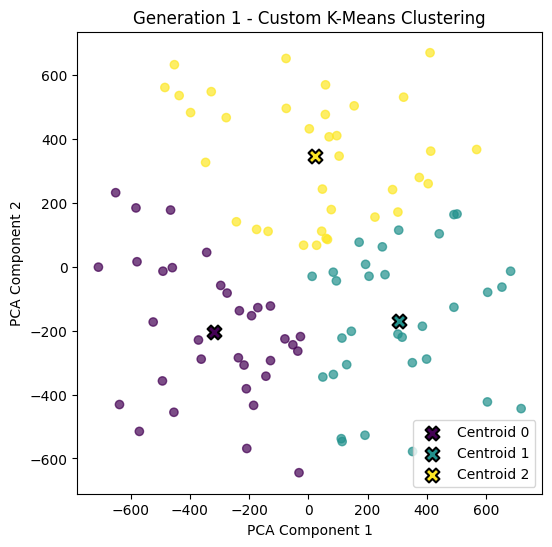

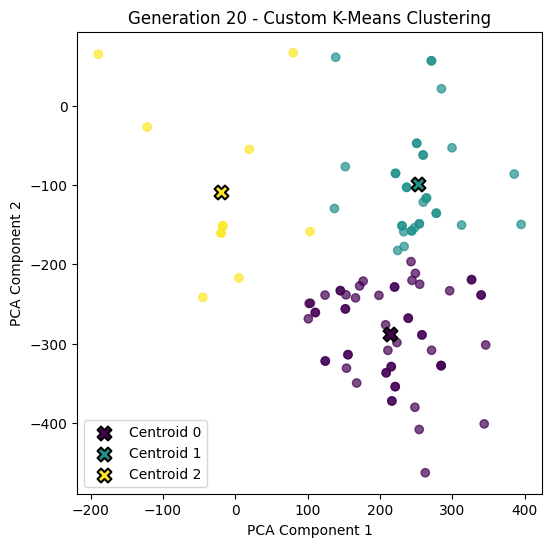

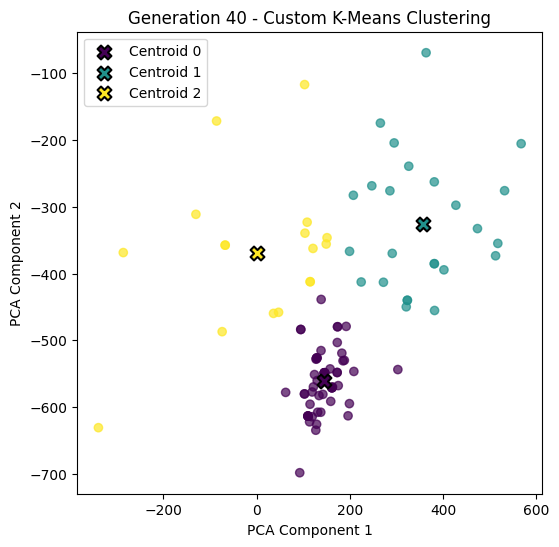

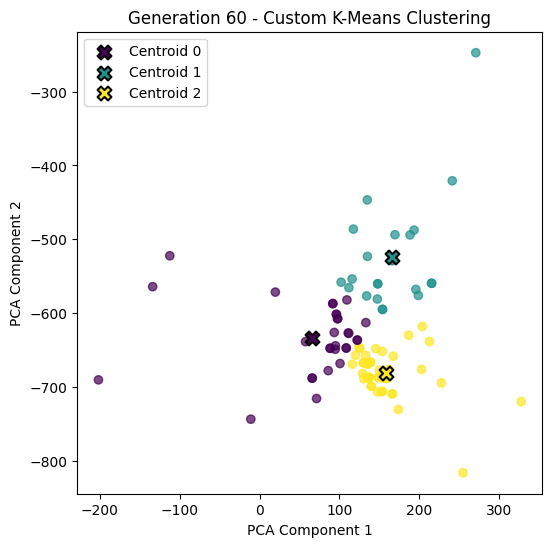

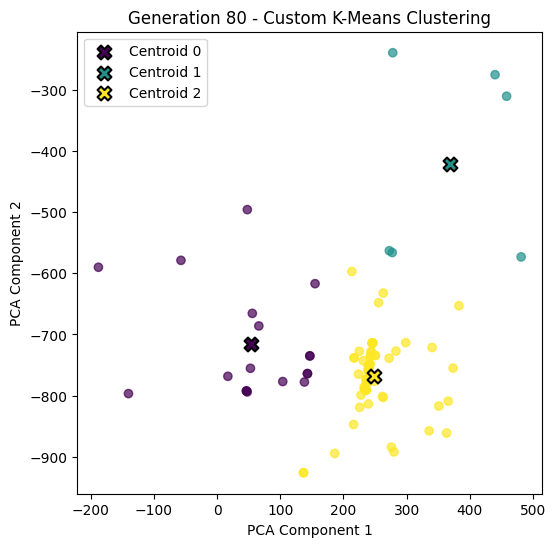

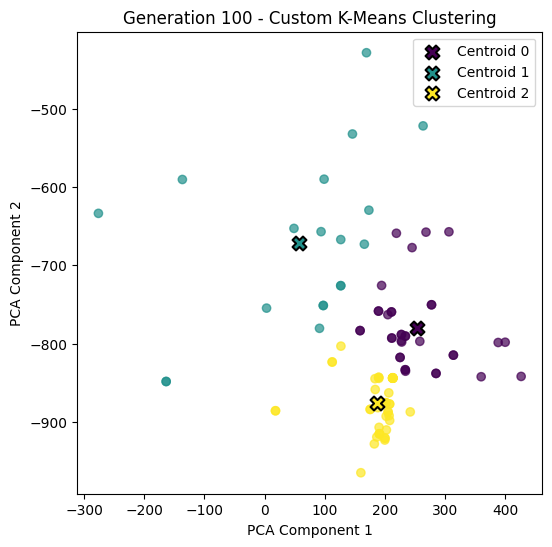

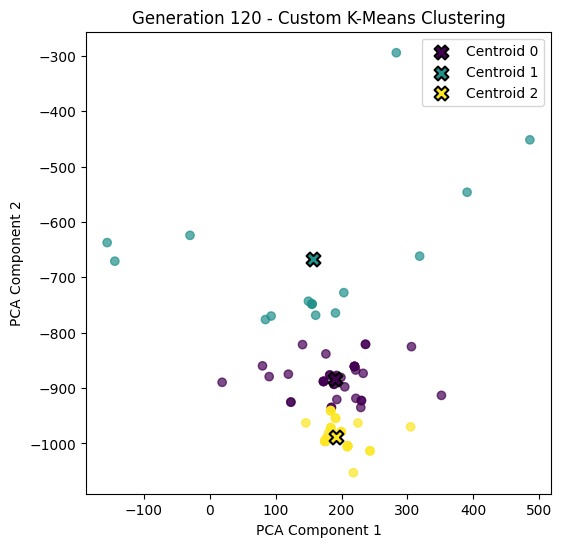

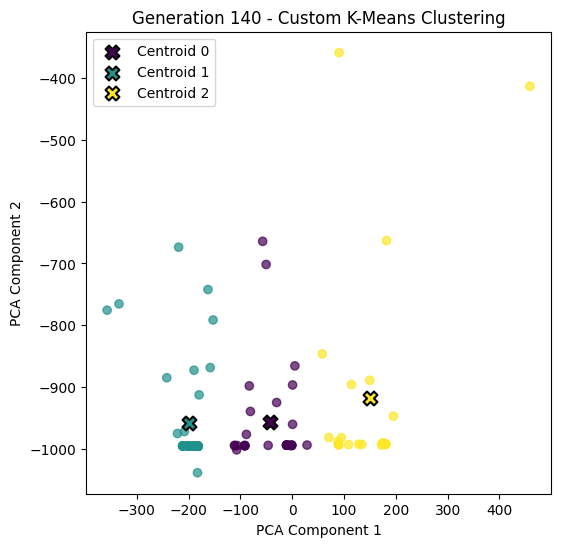

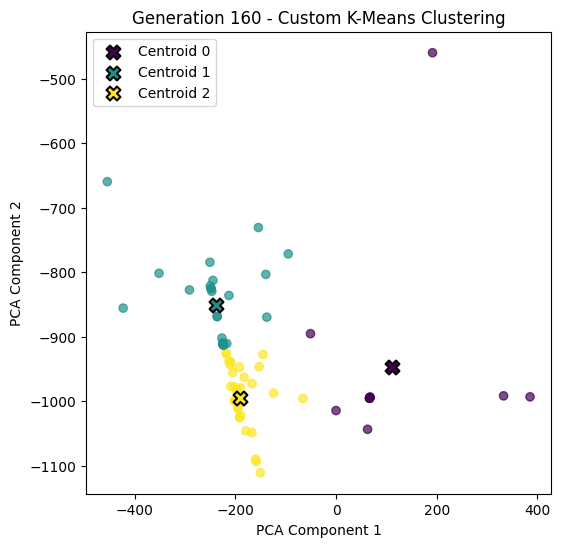

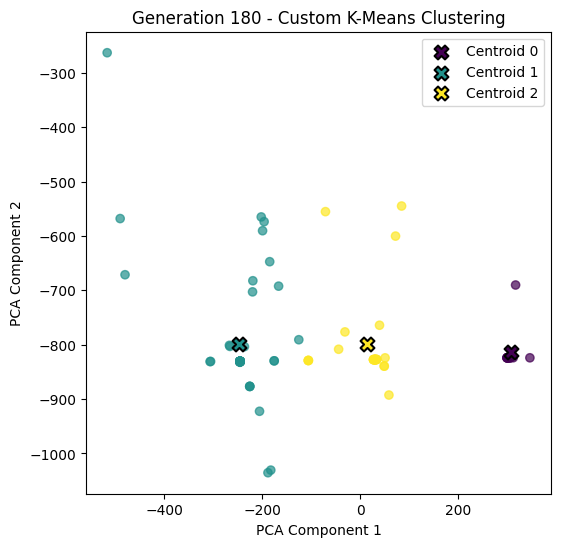

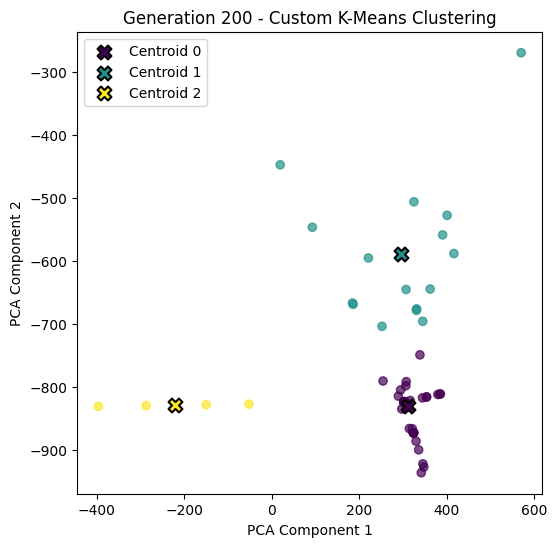

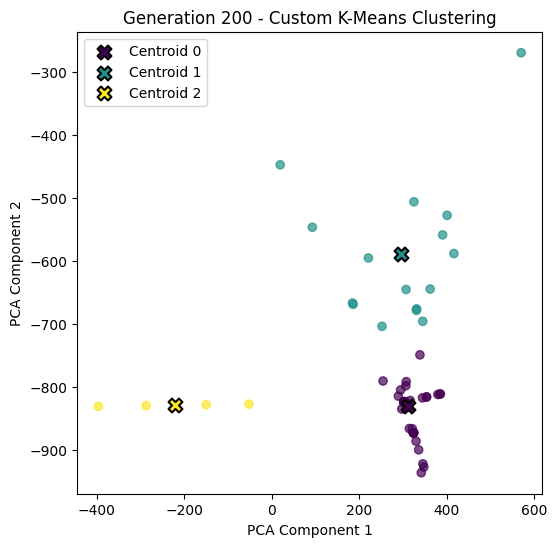

In [7]:
run("population_log_GA.csv", 3, 20)